<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICIAL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 6 </h2>
<h2 style="color:blue" align="center"> MINI-PROJECT ON DISEASE OUT-BREAK IN NIGERIA </h2>

### Aim and Objective:
#### To determine the correlation between the disease cases and it effects based on states, settlements, gender, and age groups amongst others.


## Problem Statement

1. Comparing different diseases againt age groups? If Children or Adults are more affected based on a particular diseases.
2. Which disease is the most prevalent against settlements? 
3. Mortality rate between genders.
4. Mortality rate btween rural and urban settlements 
5. Based on the diseases is there any trends to show if any deadly disease like Ebola can still surface in future.
6. Based on the diseases, is there any trends to show if any deadly disease like Malaria can still surface in the future
7. Is there any correlation between the columns that will predict if age can have high rate of contacting a particular disease. 
8. Disease more predominate in both male and female gender.
9. Disease more prevelant in different states.
10. To check state with the highest disease outbreak
    Health status and year
11. Which particular state is mostly affected based on malaria?

In [1]:
#Importing all the libraries and modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Importing the dataset
meni_data1 = pd.read_csv('meningitis_dataset (1).csv')
meni_data1

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,...,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1


## Data Cleaning 

In [147]:
#Droping unneccesary columns for our EDA and modeling
data = meni_data1.drop(['id','surname','firstname','middlename','gender_male','age_str','date_of_birth','urban_settlement','meningitis','ebola','marburg_virus','yellow_fever','rubella_mars','malaria','cholera','diarrhoea','measles','viral_haemmorrhaphic_fever','gender_female','rural_settlement','NmA','NmC','NmW','alive','dead','unconfirmed','confirmed'], axis = 'columns')
data

,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,serotype,health_status,report_outcome,null_serotype,Age_group
0,Female,Rivers,Rural,2018-05-15,2018,32,0,1,0,null serotype,alive,2,1,0
1,Male,Ebonyi,Rural,2017-02-28,2017,32,0,1,4,Null,Alive,0,1,0
2,Female,Ogun,Urban,2012-03-02,2012,24,0,1,4,Null,Dead,1,1,0
3,Female,Ondo,Rural,2010-05-21,2010,63,0,1,5,Null,Alive,1,1,2
4,Male,Oyo,Urban,2017-08-28,2017,9,1,0,7,Null,Alive,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,Female,Cross River,Rural,2012-08-24,2012,67,0,1,2,Null,Dead,0,1,2
284480,Female,Kwara,Urban,2009-01-19,2009,64,0,1,2,Null,Dead,0,1,2
284481,Female,Katsina,Rural,2010-06-10,2010,33,0,1,3,Null,Alive,0,1,0
284482,Male,Jigawa,Rural,2016-01-11,2016,18,0,1,3,Null,Dead,1,1,3


In [148]:
#Checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          284484 non-null  object
 1   state           284484 non-null  object
 2   settlement      284484 non-null  object
 3   report_date     284484 non-null  object
 4   report_year     284484 non-null  int64 
 5   age             284484 non-null  int64 
 6   child_group     284484 non-null  int64 
 7   adult_group     284484 non-null  int64 
 8   disease         284484 non-null  int32 
 9   serotype        284484 non-null  object
 10  health_status   284484 non-null  object
 11  report_outcome  284484 non-null  int32 
 12  null_serotype   284484 non-null  int64 
 13  Age_group       284484 non-null  int32 
dtypes: int32(3), int64(5), object(6)
memory usage: 27.1+ MB


In [149]:
#shape of the dataset
data.shape

(284484, 14)

In [150]:
#Checking the missing values 
data.isnull().sum()

gender            0
state             0
settlement        0
report_date       0
report_year       0
age               0
child_group       0
adult_group       0
disease           0
serotype          0
health_status     0
report_outcome    0
null_serotype     0
Age_group         0
dtype: int64

In [151]:
#Describing the data to get the statistics of the dataset
data.describe()

,report_year,age,child_group,adult_group,disease,report_outcome,null_serotype,Age_group
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,2013.503097,34.732396,0.291707,0.708293,4.497944,0.501779,0.900304,0.983089
std,2.871560,22.240912,0.454549,0.454549,2.873498,0.500005,0.299595,1.018789
min,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,14.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,2013.000000,34.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000
75%,2016.000000,54.000000,1.000000,1.000000,7.000000,1.000000,1.000000,2.000000
max,2018.000000,78.000000,1.000000,1.000000,9.000000,2.000000,1.000000,3.000000


In [152]:
#Checking for duplicate value
data.duplicated(keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
284479    False
284480    False
284481    False
284482    False
284483    False
Length: 284484, dtype: bool

In [153]:
meni_data1[['report_date']]

,report_date
0,2018-05-15
1,2017-02-28
2,2012-03-02
3,2010-05-21
4,2017-08-28
...,...
284479,2012-08-24
284480,2009-01-19
284481,2010-06-10
284482,2016-01-11


In [154]:
# checking for the amount of cases in each disease group
data[['disease']].value_counts()

disease
0          28589
1          28550
7          28539
3          28535
5          28471
4          28430
9          28428
8          28401
6          28362
2          28179
dtype: int64

In [155]:
# checking for numbers of cases with respect to gender(female and male)
g_disease = data.groupby('gender')[['disease']].value_counts().sort_values(ascending = False).head(30)
g_disease


gender  disease
Female  5          14892
        7          14888
        1          14828
        9          14776
        8          14766
        4          14714
        6          14691
        0          14673
        3          14630
        2          14414
Male    0          13916
        3          13905
        2          13765
        1          13722
        4          13716
        6          13671
        9          13652
        7          13651
        8          13635
        5          13579
dtype: int64

In [12]:
# summary of cases(disease) with respect to gender(female and male)
gender_d =data.groupby("gender")["disease"].value_counts().unstack().fillna(0)
gender_d

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
gender,,,,,,,,,,
Female,14673,14828,14414,14630,14714,14892,14691,14888,14766,14776
Male,13916,13722,13765,13905,13716,13579,13671,13651,13635,13652


In [13]:
#percentage of the male and female genders 
percent_gender = data['gender'].value_counts(normalize = True)
percent_gender.round(2)

Female    0.52
Male      0.48
Name: gender, dtype: float64

The total percentge of Female is 52% and male is 48%

In [156]:
#counts of gender
data.gender.value_counts()

Female    147272
Male      137212
Name: gender, dtype: int64

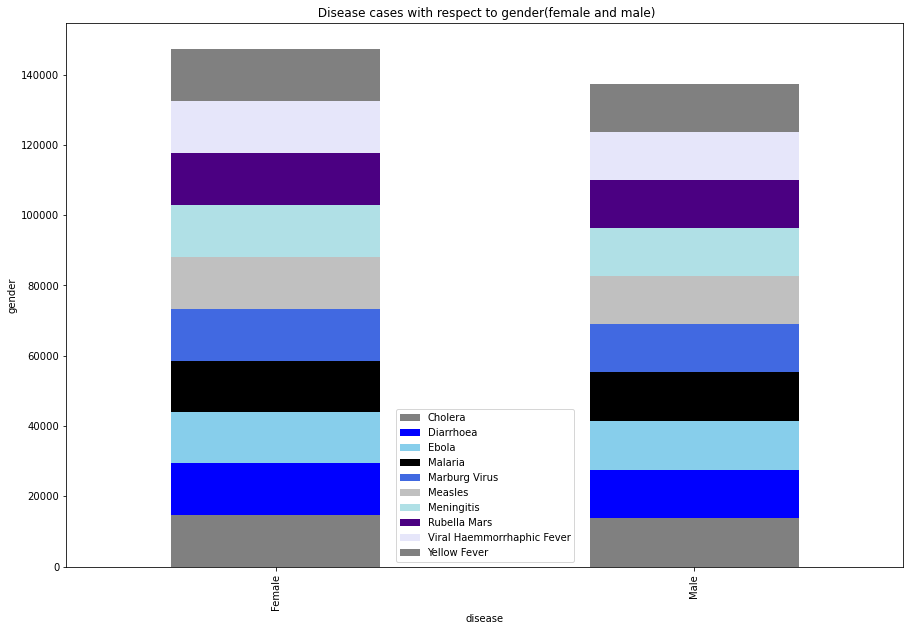

In [139]:
# visualization of cases with respect to gender(female and male)
gender_d.plot(kind ='bar', xlabel = 'disease', ylabel = 'gender',
              title = ' Disease cases with respect to gender(female and male)',
              figsize =(15,10), stacked = True, color = ['grey', 'blue', 'skyblue', 'k', 'royalblue', 'silver',
                                                     'powderblue', "indigo", "lavender"])
plt.legend();

 Females have more numbers of disease cases than males but melease is more predominant in the female with the case 4940 while for male marburg virus is more predominate with a case of 4641
 From the dataset provided, it is shown that females have more population than males and also have more distribution of diseases. However, we cannot ascertain that females are mostly affected by the diseases because the dataset is not showing the equal distribution of population among the genders.
 

###  1. Comparing different diseases againt age groups? If Children or Adults are more affected based on a particular diseases.

In [145]:
# disease base on all age group (unstacking)
gender_da =data.groupby("age")["disease"].value_counts().unstack().fillna(0)
gender_da.head(10)

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
age,,,,,,,,,,
0,10,3,11,7,2,4,5,10,14,11
1,452,417,410,414,443,451,455,412,382,440
2,701,767,738,747,775,752,755,718,775,764
3,728,739,661,698,669,669,677,678,690,726
4,657,702,674,623,686,638,642,688,650,668
5,635,657,621,653,635,613,635,632,643,622
6,583,576,523,560,579,578,598,609,559,570
7,587,536,548,526,534,519,541,589,587,554
8,472,516,522,482,532,519,513,532,500,501


In [133]:
disease_age = data.groupby(['child_group','adult_group'])['disease'].value_counts().sort_values(ascending = False)
disease_age

child_group  adult_group  disease                   
0            1            Malaria                       20316
                          Measles                       20283
                          Cholera                       20229
                          Rubella Mars                  20184
                          Diarrhoea                     20136
                          Yellow Fever                  20136
                          Marburg Virus                 20124
                          Viral Haemmorrhaphic Fever    20069
                          Meningitis                    20050
                          Ebola                         19971
1            0            Diarrhoea                      8414
                          Cholera                        8360
                          Rubella Mars                   8355
                          Viral Haemmorrhaphic Fever     8332
                          Meningitis                     8312
                 

<AxesSubplot:xlabel='disease', ylabel='count'>

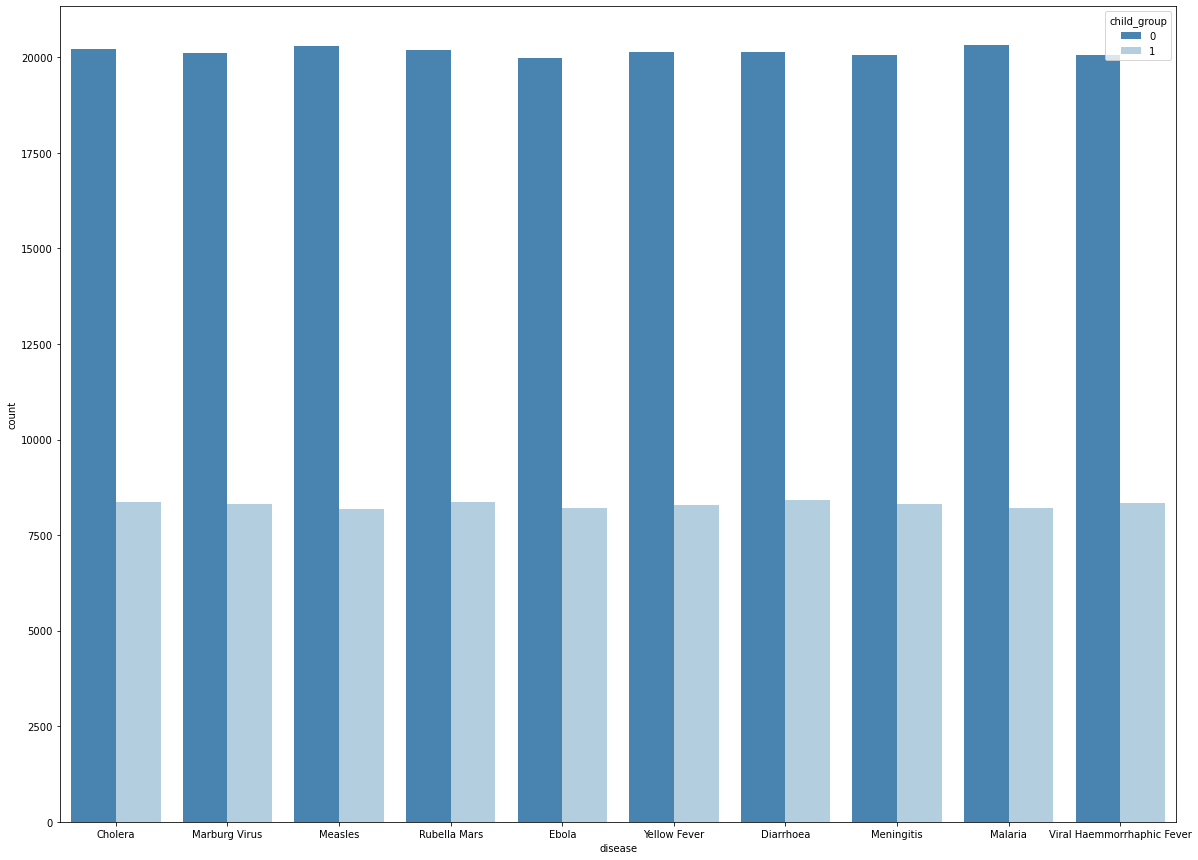

In [134]:
#Let's visualize the columns by plotting the charts
plt.figure(figsize =(20, 15))
sns.countplot(x = 'disease', hue = 'child_group', data = data, palette = 'Blues_r')

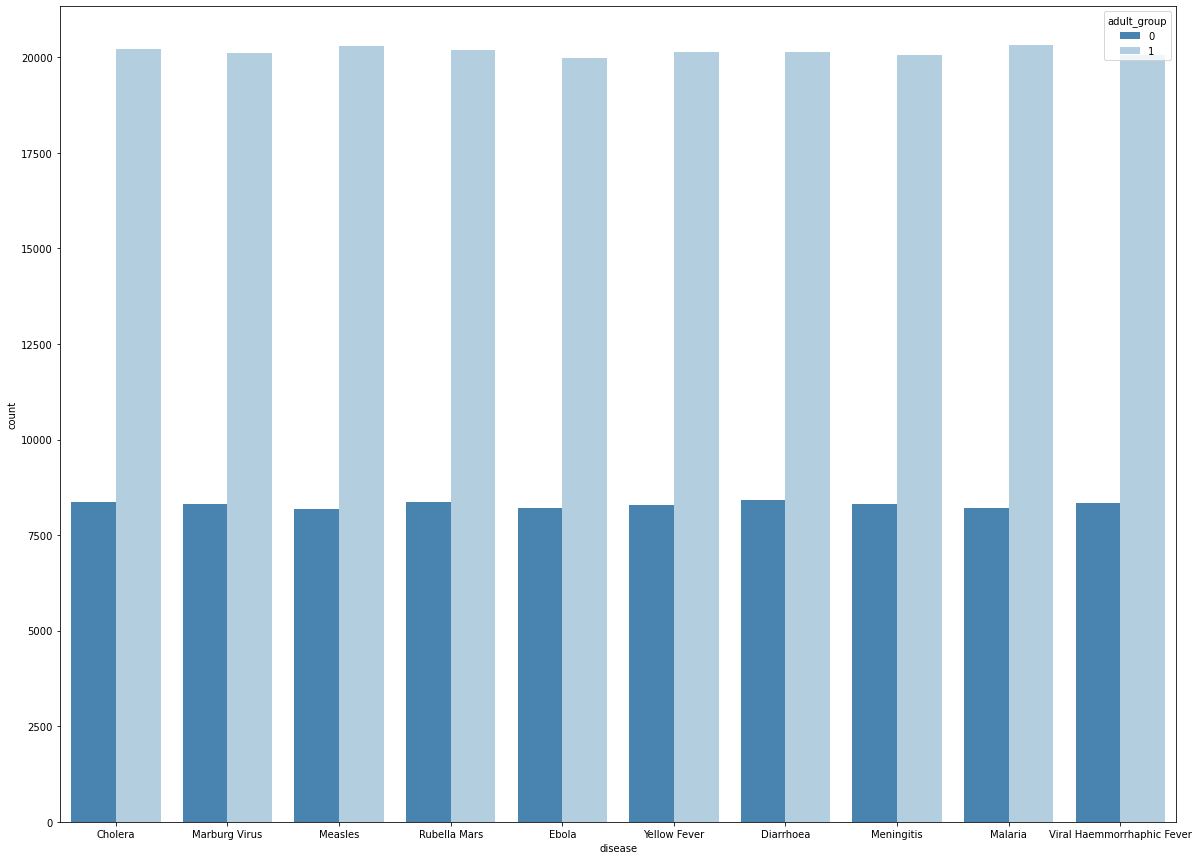

In [135]:
#Let's visualize the columns by plotting the charts
plt.figure(figsize =(20, 15))
sns.countplot(x = 'disease', hue = 'adult_group', data = data, palette = 'Blues_r');



The two charts above shows that the adult group is more affected across the various diseases and 
they are mostly affected by malaria with counts of 20,316 adults who were affected by malaria, followed by 20,283 affected 
by measles and 20,229 affected by cholera.

### 2.  Which disease is the most prevalent against settlements?

In [136]:
# disease prevailant in both urban and rural setllements 
settle_d =data.groupby("settlement")["disease"].value_counts().unstack().fillna(0)
settle_d

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
settlement,,,,,,,,,,
Rural,14307,14282,14161,14204,14219,14259,14197,14437,14180,14317
Urban,14282,14268,14018,14331,14211,14212,14165,14102,14221,14111


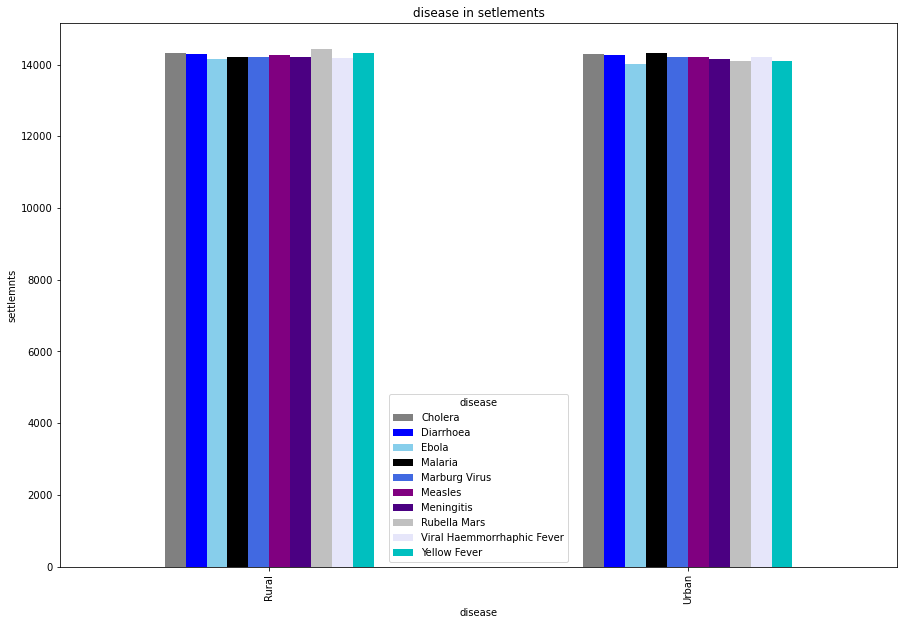

In [138]:
# visualization of disease prevailant in both urban and rural setllements 
plot = settle_d.plot.bar(figsize =(15,10), color = ['grey', 'blue', 'skyblue', 'k', 'royalblue', 'purple', 'indigo', 'silver',
                                                    'lavender', 'c'])
plt.xlabel('disease')
plt.ylabel('settlemnts')
plt.title('disease in setlements')
plt.show();

For urban settlement we have more case of malaria with a recorded case of 4768. While for Rural settlement we have marburg virus with a prevalent case of 4829.From the visualization of the dataset, it depicts that the diseases have no significant effects based on their settlements. That is to say that irrespective of your settlement whether rural or urban there's little or equal chances of being infected by the diseases.

### 3.Mortality rate between genders

In [27]:
#Replacing 'alive' row to 'Alive'
data['health_status'] =data['health_status'].str.replace ("alive", "Alive")
data['health_status'].unique()
    

array(['Alive', 'Dead'], dtype=object)

In [28]:
#Value counts of genders against health status
Morta_gen = data.groupby('gender')['health_status'].value_counts()
Morta_gen

gender  health_status
Female  Dead             73810
        Alive            73462
Male    Alive            68733
        Dead             68479
Name: health_status, dtype: int64

Text(0.5, 1.0, 'Mortality range against gender')

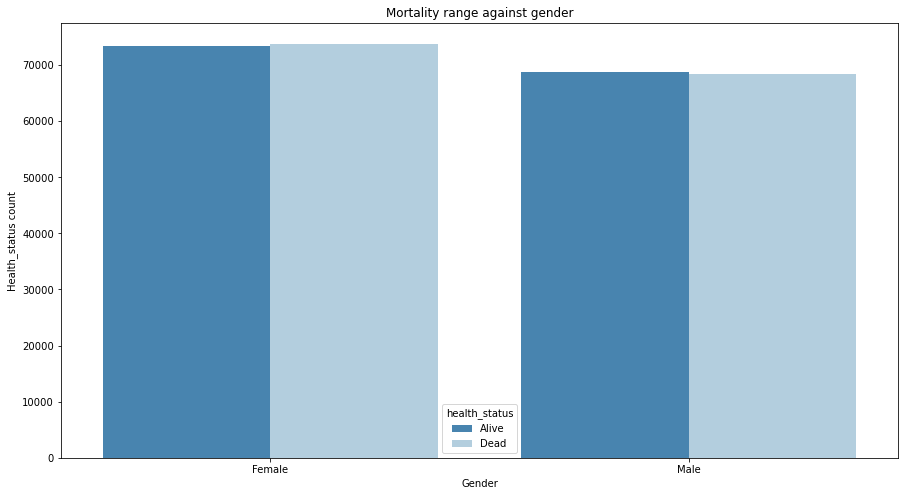

In [29]:
#Visualizing the results of the two columns
plt.figure(figsize=(15, 8))
sns.countplot(x = 'gender', hue ='health_status', data = data, palette = 'Blues_r')
plt.xlabel('Gender')
plt.ylabel('Health_status count')
plt.title('Mortality range against gender')

The chart shows that females that were dead are more than males that died. There's is a higher population of female on this dataset and alive females are slightly lower than the dead ones with 448 difference between alive and dead. 

### 4.Mortality rate btween rural and urban settlements

In [30]:
Morta_settlement = pd.crosstab(data['settlement'], data['health_status'], normalize = True)
Morta_settlement

health_status,Alive,Dead
settlement,,
Rural,0.249575,0.251554
Urban,0.250260,0.248612


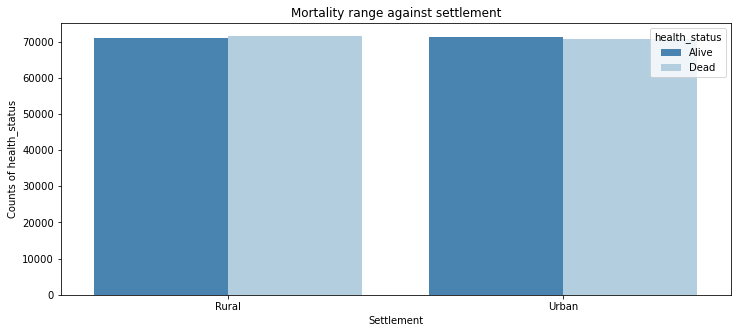

In [31]:
plt.figure(figsize =(12, 5))
sns.countplot(x = 'settlement', data =data, hue = 'health_status', palette = 'Blues_r')
plt.xlabel('Settlement')
plt.ylabel('Counts of health_status')
plt.title('Mortality range against settlement');

The chart above shows that there's slight higher mortality rate in rural settlements than in urban settlement which could be because of lack of basic health facilities and shortage of medical practitioners.  

Recommedation: We recommend that more public workers should be sent to rural settlements.

### 5. Disease across different years

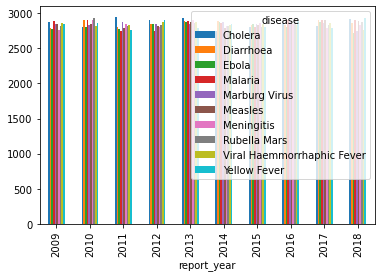

<Figure size 1080x576 with 0 Axes>

In [32]:
#Using crosstab to visualize different diseases across the years 
pd.crosstab(data.report_year, data.disease).plot(kind='bar'),
plt.figure(figsize=(15,8));


There's no year that had significant drop in the disease's breakout. This shows if nothing is done to avert or reduce the effect of the diseases on the citizens, we will continue to have increase in death rate.

### 6. Based on the diseases, is there any trends to show if any deadly disease like Malaria can still surface in the future.¶

In [33]:
#Subsetting disease column to extract malaria
dis_malaria = data[data['disease'] == 'Malaria']
dis_malaria.head()

,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,serotype,health_status,report_outcome,null_serotype
19,Female,Adamawa,Rural,2017-09-23,2017,39,0,1,Malaria,Null,Alive,Not Confirmed,1
21,Female,Rivers,Urban,2011-02-13,2011,14,1,0,Malaria,Null,Alive,Confirmed,1
37,Female,Kaduna,Rural,2010-04-02,2010,66,0,1,Malaria,Null,Dead,Confirmed,1
38,Male,Jigawa,Urban,2017-07-05,2017,8,1,0,Malaria,Null,Alive,Not Confirmed,1
40,Female,Oyo,Urban,2011-01-22,2011,17,1,0,Malaria,Null,Alive,Confirmed,1


In [34]:
dis_malaria['report_year'].unique()

array([2017, 2011, 2010, 2014, 2009, 2015, 2013, 2018, 2012, 2016],
      dtype=int64)

In [35]:
dis_malaria['report_year'].value_counts().sort_values(ascending = False)

2010    2905
2018    2903
2016    2903
2017    2900
2013    2890
2009    2884
2014    2853
2015    2810
2012    2747
2011    2740
Name: report_year, dtype: int64

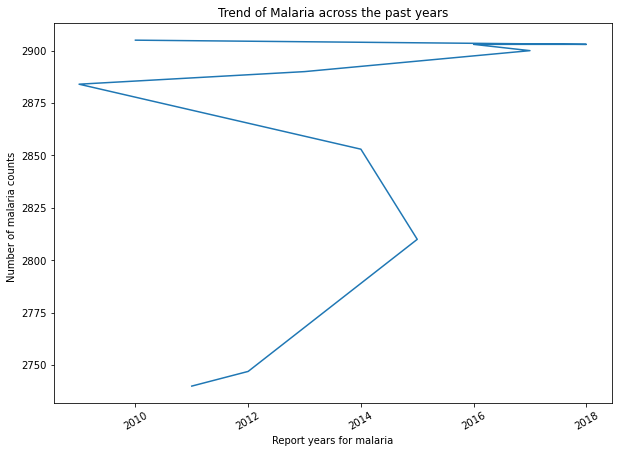

In [36]:
plt.figure(figsize =(10, 7))
dis_malaria['report_year'].value_counts().sort_values(ascending = False).plot()
plt.xticks(rotation = 30)
plt.xlabel('Report years for malaria')
plt.ylabel('Number of malaria counts  ')
plt.title('Trend of Malaria across the past years')
plt.show()

From the line chart above it shows that in 2009 there's high increase in malaria, which reduce drastically in 2011, however, there's a sudden rise in 2015 till 2018. This graph has shown that there will be countinous rise of malaria cases.

Recommendation: Government should sensitize the public about the seasons when mosquitoes are higher. There should be funding on more research on seasons where malaria will be on the rise.  

### 7. Occurance rate of malaria based on settlement. Does malaria affect the rurul settlement more than the urban settlement?


In [157]:
#Checking for counts of settlement
malaria_set = dis_malaria['settlement'].value_counts()
malaria_set

Urban    14331
Rural    14204
Name: settlement, dtype: int64

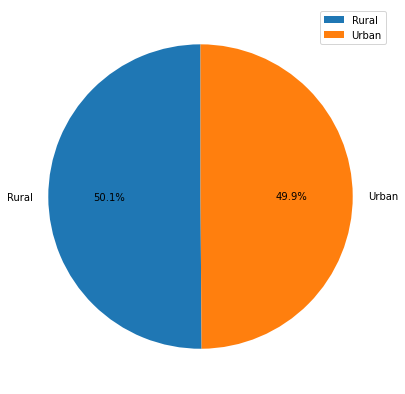

In [38]:
#Plotting the graph to see the percentage of urban and rural settlement
plt.figure(figsize =(10, 7))
plt.pie(data['settlement'].value_counts(), labels = data['settlement'].value_counts().index,
       startangle = 90,
       autopct = '%1.1f%%')
plt.legend()
plt.show()

### 8.Based on the diseases, is there any trends to show if any deadly disease like Ebola can still surface in the future.¶

In [39]:
#Subsetting disease column to extract ebola
dis_ebola = data[data['disease'] == 'Ebola']
dis_ebola.head()

,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,serotype,health_status,report_outcome,null_serotype
5,Female,Kaduna,Rural,2012-06-27,2012,44,0,1,Ebola,Null,Alive,Confirmed,1
13,Male,Nasarawa,Rural,2016-11-19,2016,3,1,0,Ebola,Null,Alive,Not Confirmed,1
35,Female,Katsina,Urban,2014-01-06,2014,27,0,1,Ebola,Null,Alive,Confirmed,1
48,Male,Katsina,Urban,2018-04-20,2018,66,0,1,Ebola,Null,Alive,Not Confirmed,1
84,Female,Jigawa,Rural,2011-11-04,2011,24,0,1,Ebola,Null,Dead,Confirmed,1


In [40]:
dis_ebola['report_year'].unique()

array([2012, 2016, 2014, 2018, 2011, 2017, 2015, 2009, 2013, 2010],
      dtype=int64)

In [41]:
dis_ebola['report_year'].value_counts().sort_values(ascending = False)

2014    2878
2013    2875
2017    2871
2015    2842
2012    2839
2010    2810
2016    2796
2011    2778
2009    2774
2018    2716
Name: report_year, dtype: int64

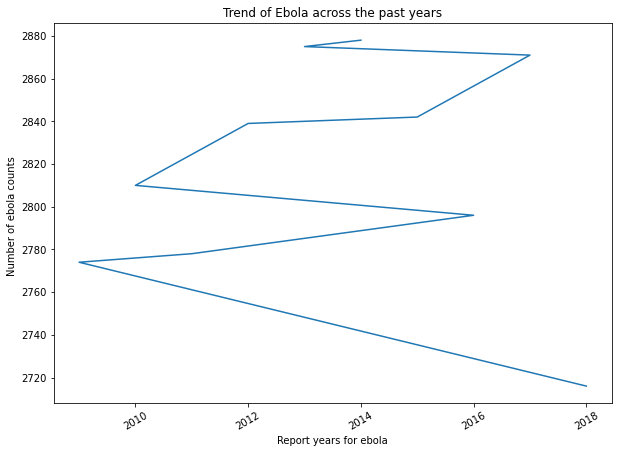

In [42]:
plt.figure(figsize =(10, 7))
dis_ebola['report_year'].value_counts().sort_values(ascending = False).plot()
plt.xticks(rotation = 30)
plt.xlabel('Report years for ebola')
plt.ylabel('Number of ebola counts  ')
plt.title('Trend of Ebola across the past years')
plt.show()

### 9. Is there any correlation between the columns that will predict if age can have high rate of contacting a particular disease

In [43]:
#correlation table
corr_dis = data.corr()
corr_dis

,report_year,age,child_group,adult_group,null_serotype
report_year,1.000000,0.108755,-0.075731,0.075731,0.000543
age,0.108755,1.000000,-0.773576,0.773576,0.002131
child_group,-0.075731,-0.773576,1.000000,-1.000000,-0.000996
adult_group,0.075731,0.773576,-1.000000,1.000000,0.000996
null_serotype,0.000543,0.002131,-0.000996,0.000996,1.000000


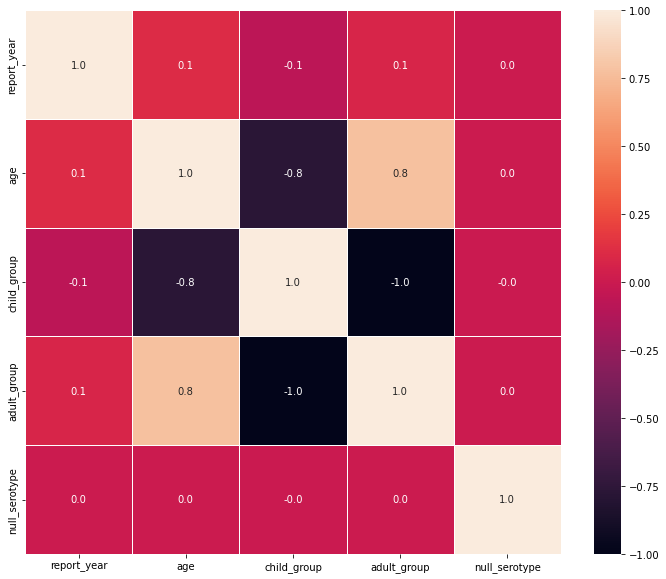

In [44]:
#Using heatmap to visualize the correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_dis, annot = True,linewidths=.5, fmt= '.1f')
plt.show()

### 10.Mortality rate against age groups ? Trying to know which age groups are more affected by the diseases

In [45]:
#Creating new columns for the age groups
data['Age_group']= ['Child'if i < 13 else "Teenager" if i < 20 else 'Adult' if i< 55 else 'Elder'for i in data.age]
data.head()

,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,serotype,health_status,report_outcome,null_serotype,Age_group
0,Female,Rivers,Rural,2018-05-15,2018,32,0,1,Cholera,null serotype,Alive,confirmed,1,Adult
1,Male,Ebonyi,Rural,2017-02-28,2017,32,0,1,Marburg Virus,Null,Alive,Confirmed,1,Adult
2,Female,Ogun,Urban,2012-03-02,2012,24,0,1,Marburg Virus,Null,Dead,Not Confirmed,1,Adult
3,Female,Ondo,Rural,2010-05-21,2010,63,0,1,Measles,Null,Alive,Not Confirmed,1,Elder
4,Male,Oyo,Urban,2017-08-28,2017,9,1,0,Rubella Mars,Null,Alive,Confirmed,1,Child


In [46]:
#Checking the percentage of the age groups
data.Age_group.value_counts(normalize = True).round(2)

Adult       0.44
Elder       0.24
Child       0.23
Teenager    0.09
Name: Age_group, dtype: float64

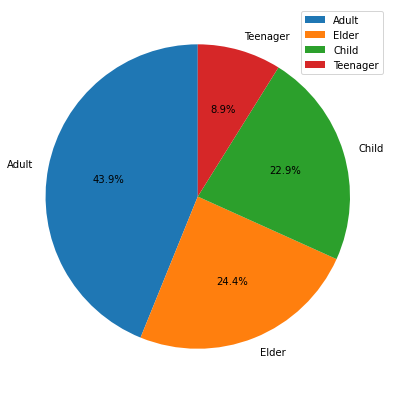

In [47]:
#Using pie chart to see the percentage of the age groups
plt.figure(figsize =(10, 7))
plt.pie(data['Age_group'].value_counts(), labels = data['Age_group'].value_counts().index,
       startangle = 90,
       autopct = '%1.1f%%')
plt.legend()
plt.show()

In [48]:
age_dis = data.groupby(['Age_group'])['disease'].value_counts().unstack()
age_dis

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
Age_group,,,,,,,,,,
Adult,12444,12347,12344,12632,12456,12589,12486,12523,12454,12515
Child,6523,6604,6400,6406,6544,6396,6546,6527,6506,6556
Elder,7028,7028,6925,6935,6938,6963,6853,6916,6898,6909
Teenager,2594,2571,2510,2562,2492,2523,2477,2573,2543,2448


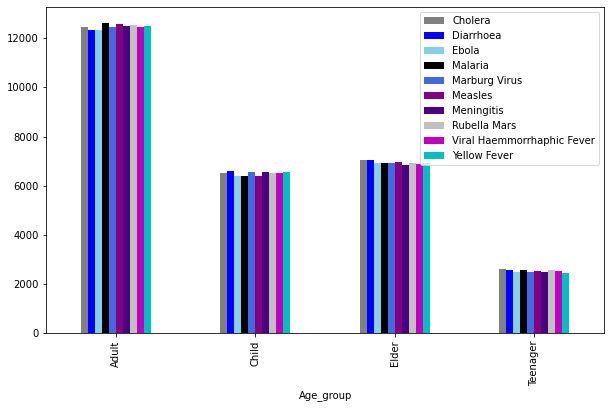

In [49]:
#Using bar plt to visualize different age groups and diseases 
plot = age_dis.plot.bar(figsize=(10, 6),color= ['grey', 'blue', 'skyblue', 'k', 'royalblue',
                                                 'purple', 'indigo', 'silver',
                                                    'm', 'c'])
plt.legend();

From the chart above, it depicts that the adult group from 20 - 54 years have higher chances of contacting these diseases followed by Elder from 55 and above while Child from 0- 12 and Teenager from 13 - 19 have lesser chances of contacting these disease. This deducts that Teengers have stronger immunity to resist the diseases from constant occurance. 

### 11. Mortality rate against age groups 

In [50]:
#Mortality rate against age groups 
age_m =data.groupby("Age_group")["health_status"].value_counts().unstack().fillna(0)
age_m

health_status,Alive,Dead
Age_group,,
Adult,62560,62230
Child,32468,32540
Elder,34649,34744
Teenager,12518,12775


<AxesSubplot:xlabel='Age_group', ylabel='count'>

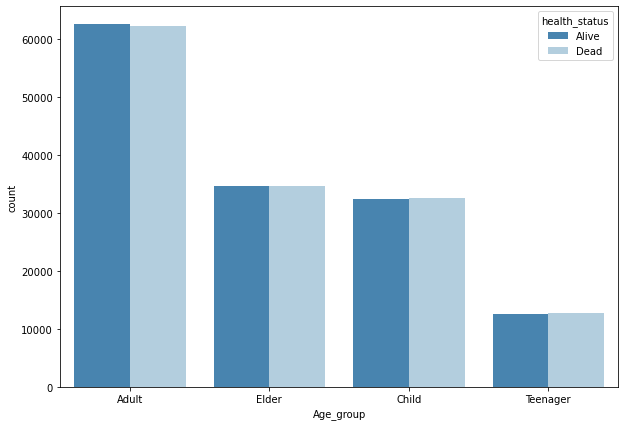

In [51]:
#Visualizing the age grpups and mortality rate
plt.figure(figsize =(10, 7))
sns.countplot(x = 'Age_group', hue = 'health_status', data = data, palette = 'Blues_r')

Looking at the previous visualization we made on age groups against diseases, we saw that the diseases affected the adult group more that others, proceeding to this visualization here, you notice that Adult group are more prone to the effect of these diseases leading to higher mortaity rate on their age group

### 12. Using Multi-variate analysis to visualize which state and in what year do we have more death?

In [52]:
#Subsetting for only dead
dead_status = meni_data1[meni_data1['health_status']== 'dead']
dead_status

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype


In [53]:
#Selecting columns to perform a multi-variate analysis
state_mortality = data[['state', 'report_year','health_status']].value_counts(ascending = False).head(10)
state_mortality 


state                      report_year  health_status
Rivers                     2012         Alive            464
Federal Capital Territory  2010         Dead             447
Bayelsa                    2013         Dead             443
Taraba                     2009         Dead             443
Kwara                      2011         Alive            438
Imo                        2013         Alive            436
Kano                       2014         Alive            433
Sokoto                     2017         Alive            431
Ondo                       2009         Dead             431
Kogi                       2016         Dead             430
dtype: int64

<AxesSubplot:xlabel='state,report_year,health_status'>

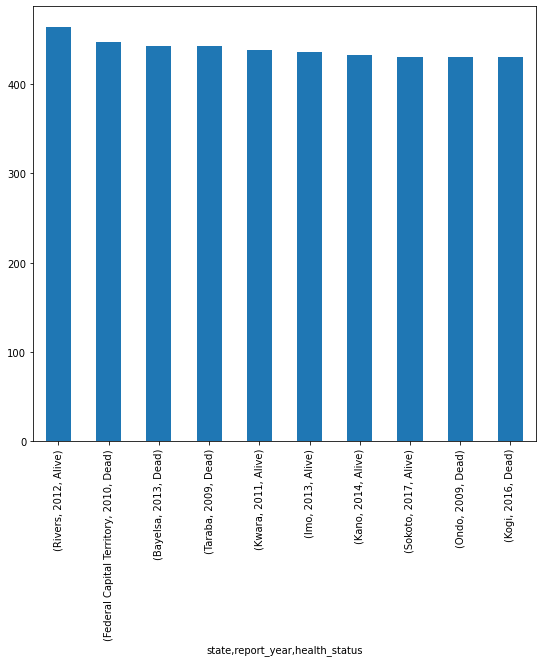

In [54]:
state_mortality.plot(x="health_status", y=["report_year", "state"], kind="bar", figsize=(9, 8))
 

In 2010 in FCT, there were 447 recorded death cases which is slightly higher than Bayelsa and Taraba.

### 13. Disease more prevalant in different states.

In [55]:
#Using group by to see the diseases in different states

dis_state = data.groupby('state')['disease'].value_counts(ascending = False).to_frame()
dis_state.sample(36).head(36)

,,disease
state,disease,
Zamfara,Cholera,788
Kaduna,Diarrhoea,785
Ogun,Rubella Mars,701
Taraba,Yellow Fever,744
Jigawa,Cholera,765
Delta,Viral Haemmorrhaphic Fever,809
Ebonyi,Ebola,812
Benue,Viral Haemmorrhaphic Fever,724
Edo,Cholera,748


<AxesSubplot:xlabel='state,disease'>

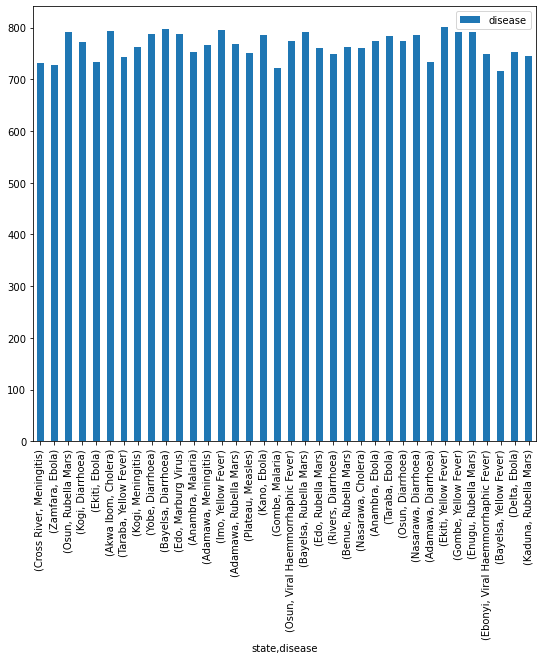

In [56]:
#Visualizing the top 5 states that are more prevalant to diseases
dis_state.sample(36).head(36).plot( kind="bar", figsize=(9, 8))


From the chart measles are more prevalant in Kwara state, viral haemmorhaphic fever and cholera are more in Niger state, Rubella Mars are more in Osun and viral haemmorhaphic fever are also more prevalant in Yobe state.

### 14. Which particular state is mostly affected based on malaria?

In [57]:
# subsetting to get dataset with malaria disease only
malaria = data[data.disease == 'Malaria']
malaria.head(3)

,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,serotype,health_status,report_outcome,null_serotype,Age_group
19,Female,Adamawa,Rural,2017-09-23,2017,39,0,1,Malaria,Null,Alive,Not Confirmed,1,Adult
21,Female,Rivers,Urban,2011-02-13,2011,14,1,0,Malaria,Null,Alive,Confirmed,1,Teenager
37,Female,Kaduna,Rural,2010-04-02,2010,66,0,1,Malaria,Null,Dead,Confirmed,1,Elder


In [58]:
states_malaria = malaria.groupby('state')['disease'].value_counts().sort_values(ascending = False).head(5)
states_malaria = pd.DataFrame(states_malaria)
states_malaria.columns = ['disease count']
states_malaria

,,disease count
state,disease,
Kano,Malaria,833
Kwara,Malaria,833
Ebonyi,Malaria,831
Edo,Malaria,805
Federal Capital Territory,Malaria,805


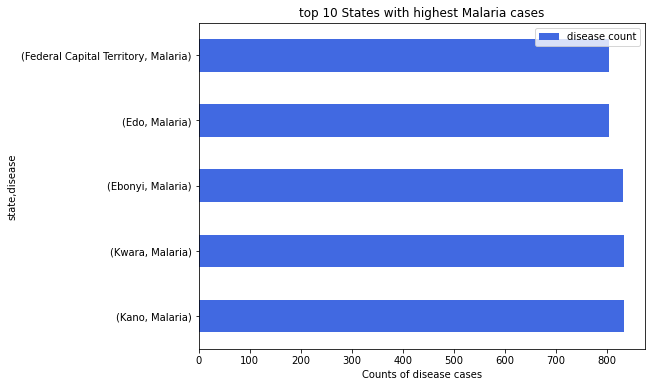

In [59]:
plot = states_malaria.plot.barh(figsize =(8,6),color='royalblue')
plt.xlabel('Counts of disease cases')
#plt.ylabel('state')
plt.title('top 10 States with highest Malaria cases')
plt.show();



From the chart above, there's a high record of malaria cases in Kano and Kwara states(833 cases recorded). 

Recommendation: As malaria was the most common disease in kwara and kano, it's recommend that government should;

Educate the masses and parents on malaria, it's danger and when to seek medical assistance.

A health campaign should be held to educate them on the proper use of mosquito net, adequate sanitation, proper human waste disposal. Government should create a sewage channel to avoid stagnant water in the states. 

### 15. Using multi_variate analysis to check state with the highest disease outbreak, Health status and year

In [60]:
#Using multi_variate analysis
distate_healthyear = data.groupby(['state', 'disease', 'report_year'])['health_status'].value_counts()
distate_healthyear

state    disease       report_year  health_status
Abia     Cholera       2009         Dead             48
                                    Alive            37
                       2010         Dead             39
                                    Alive            31
                       2011         Dead             45
                                                     ..
Zamfara  Yellow Fever  2016         Alive            35
                       2017         Alive            50
                                    Dead             33
                       2018         Alive            44
                                    Dead             44
Name: health_status, Length: 7400, dtype: int64

<AxesSubplot:ylabel='state,disease,report_year,health_status'>

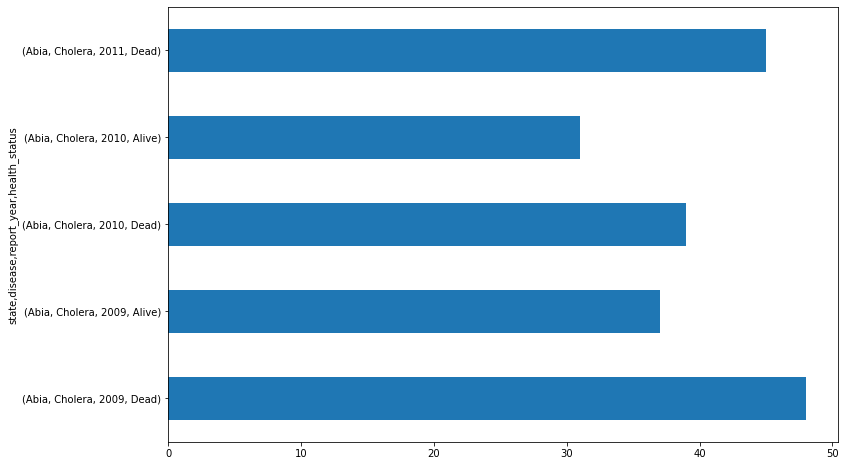

In [61]:
distate_healthyear.head().plot(kind = 'barh', figsize = (12, 8))

### MODELING OUR DATA

In [62]:
meni_data1.head(3)

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1


In [63]:
#Adding new column to the dataset
meni_data1['Age_group']= ['Child'if i < 13 else "Teenager" if i < 20 else 'Adult' if i< 55 else 'Elder'for i in data.age]
meni_data1.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype,Age_group
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,alive,1,0,confirmed,0,1,1,Adult
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,1,Alive,1,0,Confirmed,1,0,1,Adult
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,1,Dead,0,1,Not Confirmed,1,0,1,Adult
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,1,Alive,1,0,Not Confirmed,1,0,1,Elder
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,1,Alive,1,0,Confirmed,1,0,1,Child


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#using label encoder to convert category columns to numerical values 
meni_data1.report_outcome = le.fit_transform(meni_data1.report_outcome.values)
meni_data1.Age_group = le.fit_transform(meni_data1.Age_group.values)
meni_data1.disease = le.fit_transform(meni_data1.disease.values)

In [65]:
meni_data1.head(3)

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype,Age_group
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,alive,1,0,2,0,1,1,0
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,1,Alive,1,0,0,1,0,1,0
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,1,Dead,0,1,1,1,0,1,0


In [67]:
#Extracting the independent variable
x= meni_data1[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'Age_group', 'disease']]
x.head(3)

,gender_male,gender_female,rural_settlement,urban_settlement,Age_group,disease
0,0,1,1,0,0,0
1,1,0,1,0,0,4
2,0,1,0,1,0,4


In [68]:
#Extracting the dependant variable
y = meni_data1[["confirmed"]]
y.head(5)

,confirmed
0,1
1,0
2,0
3,0
4,0


### Using Logistic Regression Model

In [96]:
#importing the model
from sklearn.model_selection import train_test_split

In [97]:
##Calling the Object to build our model
model = LogisticRegression()
model

LogisticRegression()

In [105]:
#Splitting our dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 52)


In [158]:
len(x_train)

227587

In [159]:
len(x_test)

56897

In [106]:
 #Fitting the dataset for training 
reg_log =model.fit(x_train, y_train)

In [107]:
#Checking the performance of the model
model.score(x_test,y_test)

0.7483171344710617

In [108]:
y_pred= reg_log.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
#y_pred = reg_log.predict([[0, 1, 1, 0, 0, 0]])
#y_pred

In [110]:
#y_pred = reg_log.predict([[1, 0, 1, 0, 2, 4]])
#y_pred

In [111]:
Confusion_score = confusion_matrix(y_test, y_pred)
Confusion_score

array([[42577,     0],
       [14320,     0]], dtype=int64)

In [112]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     42577
           1       0.00      0.00      0.00     14320

    accuracy                           0.75     56897
   macro avg       0.37      0.50      0.43     56897
weighted avg       0.56      0.75      0.64     56897



<AxesSubplot:>

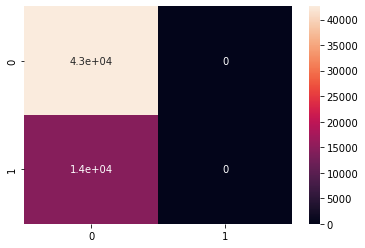

In [116]:
sns.heatmap(Confusion_score, annot = True)

### Using Decision Tree

In [76]:
#Using decision tree to see if our mode will perform better
from sklearn.tree import DecisionTreeClassifier

In [77]:
#Call in the object for model
model_dic = DecisionTreeClassifier()
model_dic

DecisionTreeClassifier()

In [78]:
#Splitting the dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [79]:
#Fitting the dataset 
model_fit = model_dic.fit(x_train, y_train)
model_fit

DecisionTreeClassifier()

In [80]:
#Checking the accuracy of our model
model_dic.score(x_test, y_test)

0.7500527265484029

### Using RandomForest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
#Call the object model
model_r = RandomForestClassifier(n_estimators = 60, random_state = 40, n_jobs = - 1, oob_score = True)
model_r

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=40)

In [82]:
#Fitting the data 
model_fit = model_r.fit(x_train, y_train)
model_fit

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=40)

In [83]:
#Checking the accuracy of the model
model_r.score(x_test, y_test)

0.7495723291073981

### Conclusion: This dataset has limitations. For instance,  there's no available symptoms to do a prediction to know if a patient has a particlar disease or not else it would have enhance the performance of our model.